## Train your own embedings

## Sample example

In [2]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1, size=10)
# summarize the loaded model
print("Model\n",model)
# summarize vocabulary
words = list(model.wv.vocab)
print("Vocabulary\n",words)
# access vector for one word
print("Embedding for sentences\n",model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print("Embedding for sentences\n",new_model['sentence'])

Model
 Word2Vec(vocab=14, size=10, alpha=0.025)
Vocabulary
 ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
Embedding for sentences
 [ 0.03068103 -0.01961401 -0.0274495  -0.00938492 -0.0054304   0.04136932
 -0.04633429  0.01577665 -0.02351939 -0.00833082]
Embedding for sentences
 [ 0.03068103 -0.01961401 -0.0274495  -0.00938492 -0.0054304   0.04136932
 -0.04633429  0.01577665 -0.02351939 -0.00833082]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


## Plot Word embeddings

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


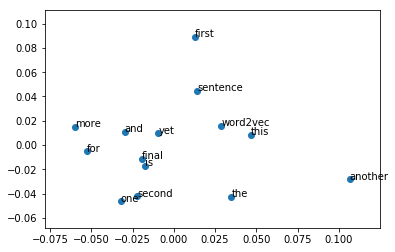

In [3]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Use our data

### Prepare our functions

In [0]:
""" CLEAN TEXT FUNCTION """

def clean_text(text):
  import re
  from unicodedata import normalize
  
  # normalize unicode
  clean = normalize('NFD', text).encode('ascii', 'ignore')
  clean = clean.decode('utf-8')

  # remove punctuation
  number_handler = re.compile(r'(?<=\d),(?=\d)')
  punct_re = re.compile('[{}]'.format(re.escape('!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-')))

  abreviation = re.compile('[^a-zA-Z0-9-_.]')
  clean = abreviation.sub(' ', clean)

  clean = number_handler.sub('',clean)
  clean = punct_re.sub(' ', clean)

  # remove any double whitespace
  clean = ' '.join(clean.split())
  
  return clean


""" PASS THE FOLDER PATH """

def parse_folder(path):
  import os
  import nltk
  from nltk.tokenize import word_tokenize
  nltk.download('punkt')
  text_data = []
  files = sorted(os.listdir(path), reverse=True)
  for file in files:
    with open(path + file, 'r') as f:
      # read text file
      text = f.read()
      # clean text data
      text = clean_text(text)
      # tokenize text
      words = word_tokenize(text)
      # append to data
      text_data.append(words)
  return text_data

### Parse data

In [0]:
path  = "./txt_sentoken/"

pos_rev = parse_folder(path=path + "pos/")

neg_rev = parse_folder(path=path + "neg/")

reviews = pos_rev + neg_rev

### Train our word embedding model from the text data

In [6]:
# train model
model = Word2Vec(reviews, min_count=1, size=10)
# summarize the loaded model
print("Model\n",model)
# summarize vocabulary
words = list(model.wv.vocab)
print("Vocabulary\n",words)

Model
 Word2Vec(vocab=39394, size=10, alpha=0.025)
Vocabulary
 ['truman', 'true', 'man', 'burbank', 'is', 'the', 'perfect', 'name', 'for', 'jim', 'carrey', 's', 'character', 'in', 'this', 'film', 'president', 'was', 'an', 'unassuming', 'who', 'became', 'known', 'worldwide', 'spite', 'of', 'or', 'it', 'because', 'his', 'stature', 'also', 'recalls', 'era', 'plenty', 'following', 'a', 'grim', 'war', 'when', 'planned', 'communities', 'built', 'by', 'government', 'scientists', 'promised', 'idyllic', 'life', 'americans', 'and', 'california', 'brings', 'to', 'mind', 'tonight', 'show', 'home', 'nbc', 'if', 'hollywood', 'center', 'world', 'tv', 'where', 'our', 'protagonist', 'lives', 'combine', 'all', 'these', 'names', 'concepts', 'into', 'you', 'get', 'something', 'that', 'well', 'describes', 'him', 'artificial', 'leads', 'town', 'car', 'wife', 'are', 'picture', 'idea', 'reality', 'comes', 'under', 'attack', 'one', 'day', 'studio', 'light', 'falls', 'from', 'sky', 'radio', 'explains', 'overfly

## Load Google’s Word2Vec Embedding

In [7]:
from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

FileNotFoundError: ignored